In [2]:
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import classification_report

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
(x_train, train_y), (x_test, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.3883 - val_loss: 0.1921
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1817 - val_loss: 0.1537
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1491 - val_loss: 0.1328
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1307 - val_loss: 0.1204
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1196 - val_loss: 0.1118
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1115 - val_loss: 0.1059
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1060 - val_loss: 0.1017
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1021 - val_loss: 0.0988
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0995 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0976 - val_loss: 0.095

In [9]:
train_encoded_imgs = encoder.predict(x_train)
test_encoded_imgs = encoder.predict(x_test)

train_decoded_imgs = decoder.predict(train_encoded_imgs)
test_decoded_imgs = decoder.predict(test_encoded_imgs)

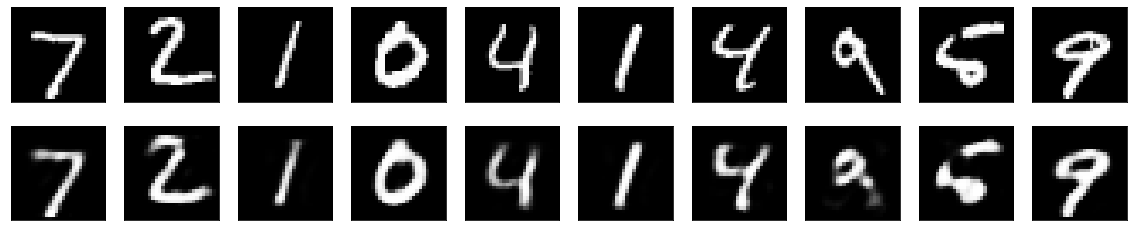

In [10]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
train_X = train_decoded_imgs[:].reshape(-1, 28,28, 1)
test_X = test_decoded_imgs[:].reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

print('Original label:', train_y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [14]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [15]:
batch_size = 64
epochs = 20
num_classes = 10

In [16]:
model_ = Sequential()
model_.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D((2, 2),padding='same'))
model_.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))                  
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Flatten())
model_.add(Dense(128, activation='linear'))
model_.add(LeakyReLU(alpha=0.1))                  
model_.add(Dense(num_classes, activation='softmax'))

In [17]:
model_.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [18]:
model_.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [19]:
mnist_train = model_.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 47s 62ms/step - loss: 0.4422 - accuracy: 0.8602 - val_loss: 0.0901 - val_accuracy: 0.9725
Epoch 2/20
750/750 [==============================] - 46s 62ms/step - loss: 0.0852 - accuracy: 0.9734 - val_loss: 0.0774 - val_accuracy: 0.9756
Epoch 3/20
750/750 [==============================] - 47s 62ms/step - loss: 0.0565 - accuracy: 0.9816 - val_loss: 0.0683 - val_accuracy: 0.9797
Epoch 4/20
750/750 [==============================] - 45s 61ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0711 - val_accuracy: 0.9789
Epoch 5/20
750/750 [==============================] - 46s 61ms/step - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0857 - val_accuracy: 0.9758
Epoch 6/20
750/750 [==============================] - 46s 61ms/step - loss: 0.0291 - accuracy: 0.9898 - val_loss: 0.0597 - val_accuracy: 0.9815
Epoch 7/20
750/750 [==============================] - 46s 61ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0659 - val_accuracy:

In [20]:
test_eval = model_.evaluate(test_X, test_Y_one_hot, verbose=0)
print(test_eval)

[0.08343750238418579, 0.9843000173568726]


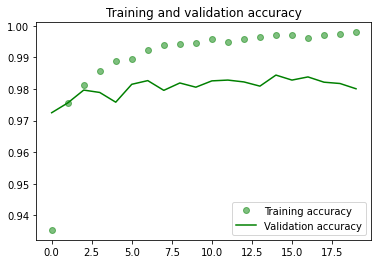

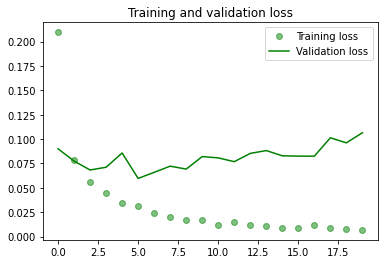

In [42]:
accuracy = mnist_train.history['accuracy']
val_accuracy = mnist_train.history['val_accuracy']
loss = mnist_train.history['loss']
val_loss = mnist_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'go', label='Training accuracy', alpha = 0.5)
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss', alpha = 0.5)
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
batch_size = 64
epochs = 20
num_classes = 10

In [31]:
model_ = Sequential()
model_.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D((2, 2),padding='same'))
model_.add(Dropout(0.25))
model_.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Dropout(0.25))
model_.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model_.add(LeakyReLU(alpha=0.1))                  
model_.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_.add(Dropout(0.4))
model_.add(Flatten())
model_.add(Dense(128, activation='linear'))
model_.add(LeakyReLU(alpha=0.1))           
model_.add(Dropout(0.3))
model_.add(Dense(num_classes, activation='softmax'))

In [32]:
model_.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [33]:
model_.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [34]:
mnist_train_dropout = model_.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 49s 65ms/step - loss: 0.6400 - accuracy: 0.7821 - val_loss: 0.1048 - val_accuracy: 0.9676
Epoch 2/20
750/750 [==============================] - 49s 65ms/step - loss: 0.1363 - accuracy: 0.9573 - val_loss: 0.0773 - val_accuracy: 0.9758
Epoch 3/20
750/750 [==============================] - 49s 65ms/step - loss: 0.1074 - accuracy: 0.9652 - val_loss: 0.0718 - val_accuracy: 0.9777
Epoch 4/20
750/750 [==============================] - 48s 64ms/step - loss: 0.0944 - accuracy: 0.9709 - val_loss: 0.0715 - val_accuracy: 0.9778
Epoch 5/20
750/750 [==============================] - 49s 65ms/step - loss: 0.0827 - accuracy: 0.9744 - val_loss: 0.0543 - val_accuracy: 0.9836
Epoch 6/20
750/750 [==============================] - 48s 65ms/step - loss: 0.0689 - accuracy: 0.9787 - val_loss: 0.0605 - val_accuracy: 0.9818
Epoch 7/20
750/750 [==============================] - 49s 66ms/step - loss: 0.0730 - accuracy: 0.9780 - val_loss: 0.0578 - val_accuracy:

In [45]:
test_eval = model_.evaluate(test_X, test_Y_one_hot, verbose=0)
print(test_eval)

[0.0422913022339344, 0.9872999787330627]


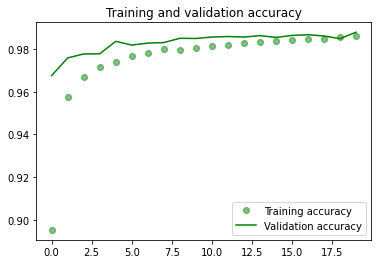

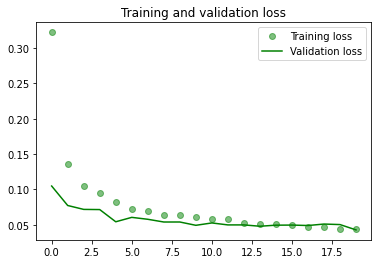

In [44]:
accuracy = mnist_train_dropout.history['accuracy']
val_accuracy = mnist_train_dropout.history['val_accuracy']
loss = mnist_train_dropout.history['loss']
val_loss = mnist_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'go', label='Training accuracy', alpha = 0.5)
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss', alpha = 0.5)
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
predicted_classes = model_.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       980
     Class 1       0.99      1.00      0.99      1135
     Class 2       0.99      0.99      0.99      1032
     Class 3       0.98      0.99      0.99      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       0.99      0.98      0.98       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.99      0.99      0.99      1028
     Class 8       0.99      0.99      0.99       974
     Class 9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [47]:
model_.save("model_mnist.h5py")